In [1]:
pwd

'/home/juju/juhan_ws/RoboManipBaselines/robo_manip_baselines/act/notebooks'

In [2]:
import torch 


model_state_dict = torch.load("/home/juju/juhan_ws/RoboManipBaselines/robo_manip_baselines/act/ckpts/MujocoUR5eCable_ACT_20241028/policy_best.ckpt")

In [3]:
import torch
import numpy as np
import sys
import os
import pickle
import argparse
import matplotlib.pyplot as plt
from copy import deepcopy
from tqdm import tqdm
from robo_manip_baselines.act import load_data

sys.path.append("../../../third_party/act")
from utils import compute_dict_mean, set_seed, detach_dict
from policy import ACTPolicy
from detr.models.detr_vae import DETRVAE

In [4]:
from robo_manip_baselines.act.bin.TrainAct import TrainAct
train_act = TrainAct(jupyter=True,batch_size=6, dataset_dir="../data/MujocoUR5eCable_20241028_official/", log_dir="../log/MujocoUR5eCable_jupyter_test_/",  task_name = "MujocoUR5eCable", state_dim=7, chunk_size=92)

kwargs :  {'batch_size': 6, 'dataset_dir': '../data/MujocoUR5eCable_20241028_official/', 'log_dir': '../log/MujocoUR5eCable_jupyter_test_/', 'task_name': 'MujocoUR5eCable', 'state_dim': 7, 'chunk_size': 92}
Updating batch_size to 6
Updating dataset_dir to ../data/MujocoUR5eCable_20241028_official/
Updating log_dir to ../log/MujocoUR5eCable_jupyter_test_/
Updating task_name to MujocoUR5eCable
Updating state_dim to 7
Updating chunk_size to 92

Data from: ../data/MujocoUR5eCable_20241028_official/

globbed_list :  [PosixPath('../data/MujocoUR5eCable_20241028_official/train/joints.npy')]
globbed_list :  [PosixPath('../data/MujocoUR5eCable_20241028_official/train/actions.npy')]
globbed_list :  [PosixPath('../data/MujocoUR5eCable_20241028_official/test/joints.npy')]
globbed_list :  [PosixPath('../data/MujocoUR5eCable_20241028_official/test/actions.npy')]
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  37
globbed_list :  [PosixPath('../data/MujocoUR5eCable_202410

/home/juju/miniconda3/envs/GraspXL/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/juju/miniconda3/envs/GraspXL/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


number of parameters: 83.90M
KL Weight 10


# load dataset

In [5]:
for batch_idx, data in enumerate(train_act.train_dataloader):
    print(batch_idx)
    # if batch_idx == 5:
    #     print(batch_idx , data)
    #     break
    

self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  6
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  84
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  72
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  30
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  90
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  53
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  27
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  74
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  1
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  62
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  66
self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  53
self.dataset_dir  ../data/Mujo

In [6]:
print("joint mean : ", train_act.train_dataloader.dataset.norm_stats['joint_mean'])
print("action mean :", train_act.train_dataloader.dataset.norm_stats['action_mean'])

joint mean :  [  3.2268248  -1.984776   -1.6708279  -1.1268398   1.5371674   1.650115
 172.6019   ]
action mean : [  3.2348642  -1.9725294  -1.6489645  -1.1299943   1.5348665   1.658822
 233.95653  ]


In [7]:
print("joint mean : ", train_act.train_dataloader.dataset.norm_stats['joint_std'])
print("action mean :", train_act.train_dataloader.dataset.norm_stats['action_std'])

joint mean :  [ 0.26449376  0.20222208  0.27922085  0.13307796  0.02163804  0.26243052
 10.362099  ]
action mean : [2.5913849e-01 2.0104644e-01 2.7770829e-01 1.2624310e-01 2.1475539e-02
 2.5715128e-01 4.1458527e+01]


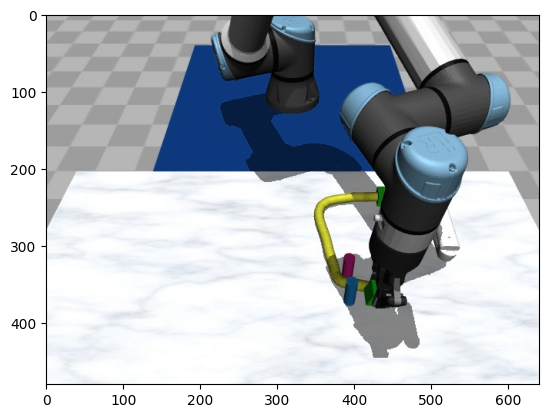

In [8]:
img_ = data[0][0][0].permute(1,2,0)
plt.imshow(img_.detach().cpu())

In [9]:
torch.sum(torch.where(data[3]==True,1,0),dim=1)

tensor([55, 48, 89, 77, 63, 21])

In [10]:
len(train_act.train_dataloader), len(train_act.val_dataloader)

(4, 1)

In [11]:
for k,v in train_act.train_dataloader.dataset.norm_stats.items():
    print(k, v.shape)

action_mean (7,)
action_std (7,)
joint_mean (7,)
joint_std (7,)
example_joint (6, 92, 7)


In [12]:
from pathlib import Path
def load_array(dir_path, glob_pattern):
    globbed_list = list(dir_path.glob(glob_pattern))
    print("globbed_list : ", globbed_list)
    assert len(globbed_list) == 1
    return np.load(globbed_list[0])

dir_path = Path(train_act.args.dataset_dir)
train_dataset_dir = dir_path / "train"
val_dataset_dir =  dir_path / "test"

# data가 너무 많아 버리면 어떻게 사용하나 ? ㅋㅋㅋ 
# 이미지에서 학습하는 방식으로 주소만 가져오고 npy 파일 다 긁어오게 만들어야겠네. 
original_action = load_array(train_dataset_dir, "**/actions.npy")[12]
original_action_shape = original_action.shape
episode_len = original_action_shape[0]

original_mask = load_array(train_dataset_dir, "**/masks.npy")[5].astype(
    bool
)

globbed_list :  [PosixPath('../data/MujocoUR5eCable_20241028_official/train/actions.npy')]
globbed_list :  [PosixPath('../data/MujocoUR5eCable_20241028_official/train/masks.npy')]


In [13]:
def load_array(dir_path, glob_pattern):
    globbed_list = list(dir_path.glob(glob_pattern))
    print("globbed_list : ", globbed_list)
    assert len(globbed_list) == 1
    return np.load(globbed_list[0])

episode_id = 10
original_action = load_array(train_dataset_dir, "**/actions.npy")[episode_id]
original_action_shape = original_action.shape
episode_len = original_action_shape[0]

episode_len

globbed_list :  [PosixPath('../data/MujocoUR5eCable_20241028_official/train/actions.npy')]


92

In [14]:
len(train_act.train_dataloader.dataset), len(train_act.val_dataloader.dataset)

(24, 6)

In [15]:
pad_ = train_act.train_dataloader.dataset[5][-1]

pad_, torch.sum(pad_), pad_.shape

self.dataset_dir  ../data/MujocoUR5eCable_20241028_official/train
start_ts :  64


(tensor([False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True]),
 tensor(73),
 torch.Size([92]))

In [16]:
start_ts = 23 
mask = original_mask[start_ts:]

action_len = episode_len - start_ts
print("action_len", action_len)
padded_mask = np.zeros(episode_len, dtype=bool)
padded_mask[:action_len] = mask
is_pad = ~padded_mask


action_len 69


In [17]:
is_pad

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [18]:
train_act.args.camera_names

['front']

In [19]:
import torchvision.transforms as transforms

image_data, joint_data, action_data, is_pad = data 

image_data_c, joint_data_c, action_data_c, is_pad_c = (
    image_data.cuda(),
    joint_data.cuda(),
    action_data.cuda(),
    is_pad.cuda(),
)

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
image_data_c = normalize(image_data_c)

# training time 
if action_data_c is not None: # training time
    action_data_c = action_data_c[:, :train_act.policy.model.num_queries]
    is_pad_c = is_pad_c[:, :train_act.policy.model.num_queries]


In [20]:
action_data_c.shape

torch.Size([6, 92, 7])

In [21]:
is_pad_c.shape

torch.Size([6, 92])

In [22]:
# train_act.policy.model(joint_data_c, image_data_c, None, action_data_c, is_pad_c)

In [23]:
joint_data_c.shape

torch.Size([6, 7])

In [24]:
# train_act.policy(joint_data_c, image_data_c, action_data_c, is_pad_c)

In [25]:
train_act.policy.model.cls_embed

Embedding(1, 512)

## 학습 Pipeline 

In [102]:
from torch.autograd import Variable


# bs, _ = joint_data_c.shape

# action_embed = train_act.policy.model.encoder_action_proj(action_data_c) # (bs, seq, hidden_dim)
# qpos_embed = train_act.policy.model.encoder_joint_proj(joint_data_c)  # (bs, hidden_dim)
# qpos_embed = torch.unsqueeze(qpos_embed, axis=1)  # (bs, 1, hidden_dim)
# cls_embed = train_act.policy.model.cls_embed.weight # (1, hidden_dim)
# cls_embed = torch.unsqueeze(cls_embed, axis=0).repeat(bs, 1, 1) # (bs, 1, hidden_dim)
# # print("cls_embed shape :", cls_embed.shape, qpos_embed.shape, action_embed.shape )
# encoder_input = torch.cat([cls_embed, qpos_embed, action_embed], axis=1) # (bs, seq+1, hidden_dim)
# encoder_input = encoder_input.permute(1, 0, 2) # (seq+1, bs, hidden_dim)

#########

# cls_joint_is_pad = torch.full((bs, 2), False).to(joint_data_c.device) # False: not a padding
# is_pad = torch.cat([cls_joint_is_pad, is_pad_c], axis=1)  # (bs, seq+1)
# pos_embed = train_act.policy.model.pos_table.clone().detach()
# pos_embed = pos_embed.permute(1, 0, 2)  # (seq+1, 1, hidden_dim)
# encoder_output = train_act.policy.model.encoder(encoder_input, pos=pos_embed[:encoder_input.shape[0]], src_key_padding_mask=is_pad)

##########

# encoder_output = encoder_output[0] # take cls output only
# latent_info = train_act.policy.model.latent_proj(encoder_output) # [B, latent_dim * 2]
# mu = latent_info[:, :train_act.policy.model.latent_dim]
# logvar = latent_info[:, train_act.policy.model.latent_dim:]

# std = logvar.div(2).exp()
# eps = Variable(std.new(std.size()).normal_())

# latent_sample = mu + std * eps
# latent_input = train_act.policy.model.latent_out_proj(latent_sample)

######### Encoder 끝 

######### Prediction action sequence 시작 

# all_cam_features = []
# all_cam_pos = []
# for cam_id, cam_name in enumerate(train_act.policy.model.camera_names):
#     features, pos = train_act.policy.model.backbones[0](image_data_c[:, cam_id]) # HARDCODED
#     features = features[0] # take the last layer feature
#     pos = pos[0]
#     all_cam_features.append(train_act.policy.model.input_proj(features))
#     all_cam_pos.append(pos)
# # proprioception features
# proprio_input = train_act.policy.model.input_proj_robot_state(joint_data_c)
# # fold camera dimension into width dimension
# src = torch.cat(all_cam_features, axis=3)
# pos = torch.cat(all_cam_pos, axis=3)            
# hs = train_act.policy.model.transformer(src, None, 
#                                         train_act.policy.model.query_embed.weight, 
#                                         pos, 
#                                         latent_input, 
#                                         proprio_input, 
#                                         train_act.policy.model.additional_pos_embed.weight
#                                         )[0]

a_hat = train_act.policy.model.action_head(hs)
is_pad_hat = train_act.policy.model.is_pad_head(hs)

In [92]:
src.shape, src.flatten(2).permute(2, 0, 1).shape

(torch.Size([6, 512, 15, 20]), torch.Size([300, 6, 512]))

In [94]:
pos.shape, pos.flatten(2).permute(2, 0, 1).repeat(1, bs, 1).shape

(torch.Size([1, 512, 15, 20]), torch.Size([300, 6, 512]))

In [103]:
hs.shape, a_hat.shape, is_pad_hat.shape

(torch.Size([6, 92, 512]), torch.Size([6, 92, 7]), torch.Size([6, 92, 1]))

In [98]:
train_act.policy.model.additional_pos_embed.weight.shape, train_act.policy.model.additional_pos_embed.weight.unsqueeze(1).repeat(1, bs, 1).shape # seq, bs, dim

(torch.Size([2, 512]), torch.Size([2, 6, 512]))

In [71]:
features.shape, all_cam_features[0].shape, all_cam_pos[0].shape

(torch.Size([6, 512, 15, 20]),
 torch.Size([6, 512, 15, 20]),
 torch.Size([1, 512, 15, 20]))

In [60]:
image_data.shape

torch.Size([6, 1, 3, 480, 640])

In [62]:
480 / 15, 640/20

(32.0, 32.0)

In [59]:
features[0].shape

torch.Size([512, 15, 20])

In [40]:
train_act.policy.model.backbones[0]

Joiner(
  (0): Backbone(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatc

In [32]:
image_data_c.shape

torch.Size([6, 1, 3, 480, 640])

In [30]:
latent_sample.shape, latent_input.shape

(torch.Size([6, 32]), torch.Size([6, 512]))

In [36]:
cls_joint_is_pad.shape, is_pad_c.shape

(torch.Size([6, 2]), torch.Size([6, 92]))

In [45]:
is_pad.shape, pos_embed.shape, encoder_input.shape[0]

(torch.Size([6, 94]), torch.Size([94, 1, 512]), 94)

In [29]:
asd 

NameError: name 'asd' is not defined

In [ ]:
train_act.policy

train_act.policy

In [ ]:
lr_backbone = 1e-5
backbone = "resnet18"
enc_layers = 4
dec_layers = 7
nheads = 8
policy_config = {
    "lr": self.args.lr,
    "num_queries": self.args.chunk_size,
    "kl_weight": self.args.kl_weight,
    "hidden_dim": self.args.hidden_dim,
    "dim_feedforward": self.args.dim_feedforward,
    "lr_backbone": lr_backbone,
    "backbone": backbone,
    "enc_layers": enc_layers,
    "dec_layers": dec_layers,
    "nheads": nheads,
    "camera_names": self.args.camera_names,
    "state_dim"  : self.args.state_dim, 
}

self.policy = ACTPolicy(policy_config)